In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result) // 2:]

## Energy and magnetization termalization

#### Termalizacion en funcion de J

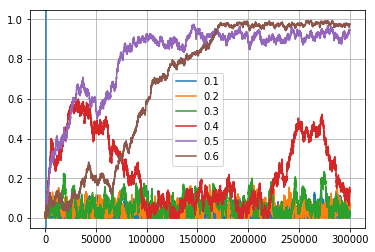

In [90]:
length = 300000

plt.axvline(32 * 32)
for j in ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6']:
    
    df = pd.read_csv(f'../valores/terma_{j}.dat')
    m = np.zeros(length)
    e = np.zeros(length)
    
    ids = df.id.unique()
    for i in ids:
        m += abs(df.query(f'id == {i}').m.values[0:length])
        e += df.query(f'id == {i}').e.values[0:length]
        
    m = m / len(ids)
#     e = e / len(ids)
    plt.plot(m, label=j)
#     plt.plot(e, label=j)

plt.grid()
plt.legend()
# plt.ylim(-0.05, 1.05)
plt.show()

### Correlacion

Para samples despues de la termalizacion, calcular la autocorrelacion.

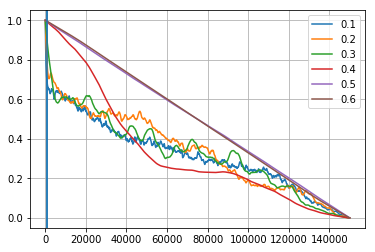

In [94]:
termalizacion = 150000
length = 300000

plt.axvline(32 * 32)
for j in ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6']:
    
    df = pd.read_csv(f'../valores/terma_{j}.dat')
    corr = np.zeros(length - termalizacion)
    
    ids = df.id.unique()
    for i in ids:
        temp = autocorr(abs(df.query(f'id == {i}').m.values[termalizacion:length]))
        corr += temp / max(temp)
    corr = corr / len(ids)

    plt.plot(corr, label=j)

plt.axvline(32 * 32)
plt.grid()
plt.legend()
plt.ylim(-0.05, 1.05)
plt.show()